In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn import datasets
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut

Dataset MNIST location after download

In [2]:
!ls '../HP/ats-machine vision

emnist-bymerge-mapping.txt
emnist-bymerge-test.csv
emnist-bymerge-train.csv


Load MNIST dataset from Folder

In [3]:
train_dataset = pd.read_csv('../HP/ats-machine vision/emnist-bymerge-train.csv')

In [4]:
test_dataset = pd.read_csv('../HP/ats-machine vision/emnist-bymerge-test.csv')

In [5]:
label_map_dataset = pd.read_csv('../HP/ats-machine vision/emnist-bymerge-mapping.txt', sep='\\s+', header=None)

CSV File Mapping

In [6]:
mapping_dict = {row[0]: chr(row[1]) for _, row in label_map_dataset.iterrows()}

train_images = np.array(train_dataset.iloc[:,1:].values)
train_labels = np.array(train_dataset.iloc[:,0].values)

test_images = np.array(test_dataset.iloc[:,1:].values)
test_labels = np.array(test_dataset.iloc[:,0].values)

Image MNIST display

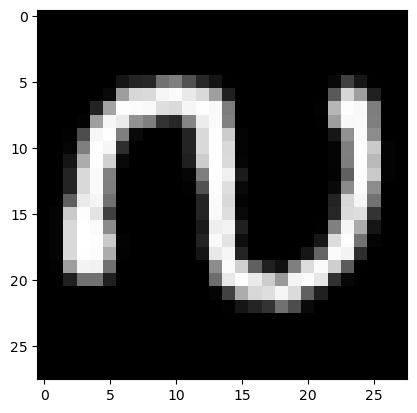

In [7]:
plt.imshow(train_images[14].reshape(28,28), cmap='gray')

In [8]:
train_images.shape

(1000, 784)

Image MNIST Rotate

In [9]:
def rotate(train_images):
    train_images = train_images.reshape([28, 28])
    train_images = np.fliplr(train_images)
    train_images = np.rot90(train_images)
    return train_images.flatten()

X_train = np.apply_along_axis(rotate, 1, train_images)
X_test = np.apply_along_axis(rotate, 1, test_images)

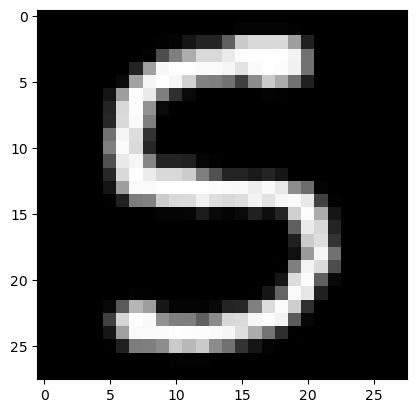

In [10]:
plt.imshow(X_train[14].reshape(28,28), cmap='gray')

Extract HOG feature from image

In [11]:
feature, hog_images = hog(train_images[14].reshape(28,28),orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=True,block_norm='L2')

Process Image by using HOG Feature Extraction

In [12]:
n_dims = feature.shape[0]
n_samples = train_images.shape[0]

Create Variable Dataset

In [13]:
X_train_hog, y_train = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [14]:
from skimage.feature import hog
def extract_hog_features(train_images, pixels_per_cell=(8, 8), cells_per_block=(2, 2), orientations=9):
    hog_features = []
    
    for i in range (n_samples):
        features = hog(train_images[i].reshape(28,28), orientations=orientations, pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block, block_norm='L2')
        hog_features.append(features)
    return np.array(hog_features)

In [15]:
hog_train = extract_hog_features(X_train)
hog_test = extract_hog_features(X_test)

In [16]:
hog_train.shape

(1000, 144)

SVM Classifier and LOOCV Evaluation

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_hog = scaler.fit_transform(hog_train)
X_test_hog = scaler.transform(hog_test)

cv = LeaveOneOut()
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

y_true = []
y_pred = []

LOOCV

In [18]:
for train_index, test_index in cv.split(X_train_hog):
    X_train, X_test = X_train_hog[train_index], X_test_hog[test_index]
    y_train, y_test = train_labels[train_index], test_labels[test_index]

    svm_model.fit(X_train, y_train)
    
    prediction = svm_model.predict(X_test)
    
    y_true.append(y_test[0])
    y_pred.append(prediction[0])

Evaluation Metrics

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score


Confussion Matrix

In [20]:
confussion_matrix = confusion_matrix(test_labels,y_pred)

In [21]:
print("Test Confusion Matrix:\n", confussion_matrix)

Test Confusion Matrix:
 [[ 9  1  0 ...  0  0  0]
 [ 0 17  0 ...  0  0  0]
 [ 0  0 16 ...  0  0  0]
 ...
 [ 0  1  0 ...  7  0  0]
 [ 0  0  0 ...  0 11  1]
 [ 0  0  0 ...  0  0 17]]


Precission

In [22]:
precision = precision_score(y_true, y_pred, average='macro')

In [23]:
print("Test precision:\n", precision)

Test precision:
 0.6503740801032813


Accuracy

In [25]:
accuracy = accuracy_score(y_true, y_pred)

In [26]:
print("Test accuracy:\n", accuracy)

Test accuracy:
 0.633


F1 - Score

In [27]:
f1 = f1_score(y_true, y_pred, average='macro')

In [28]:
print("Test f1:\n", f1)

Test f1:
 0.6318940634143402
